In [1]:
from sympy import symbols, sin, cos, Matrix,N


## Generator to infinite bus

### Model

In [2]:
delta,p_m, X, e,v,H,omega_s,omega,D,Omega_b,e_0 = symbols('delta,p_m, X, e,v,H,omega_s,omega,D,Omega_b,e_0' )


In [3]:
K_stab =8.0
e = e_0 + K_stab*(omega - 1.0)
p_e = e*v/X*sin(delta)

f_1 = ddelta = Omega_b*(omega - omega_s)
f_2 = domega = 1.0/(2*H)*(p_m - p_e - D*(omega - omega_s))

### Initial values

In [4]:
f = Matrix([f_1,f_2])
x = Matrix([delta,omega])
A = f.jacobian(x)
print(A)

Matrix([[0, Omega_b], [-0.5*v*(e_0 + 8.0*omega - 8.0)*cos(delta)/(H*X), 0.5*(-D - 8.0*v*sin(delta)/X)/H]])


### Numerical evaluation

In [6]:
import numpy as np

p_m = 1.0
X = 0.5
e = 1.0
e_0 = e
v = 1.0
H = 3.5
omega_s = 1.0
omega = omega_s
D = 0.0
Omega_b = 2.0*np.pi*50.0
p_e = p_m
delta = np.arcsin(p_e*X/(e*v))  
omega = omega_s

A_n  = np.array(A.evalf(subs={'Omega_b':Omega_b,'H':H,'D':D,'X':X,'delta':delta,'e':e,'v':v, 'omega_s':omega_s, 'omega':omega, 'e_0':e_0}))
A_n = np.array(A_n, dtype = np.float)
print(A_n)

[[ 0.00000000e+00  3.14159265e+02]
 [-2.47435830e-01 -1.14285714e+00]]


### Small signal

In [8]:
w, v = np.linalg.eig(A_n)
print(w)

[-0.57142857+8.79816616j -0.57142857-8.79816616j]


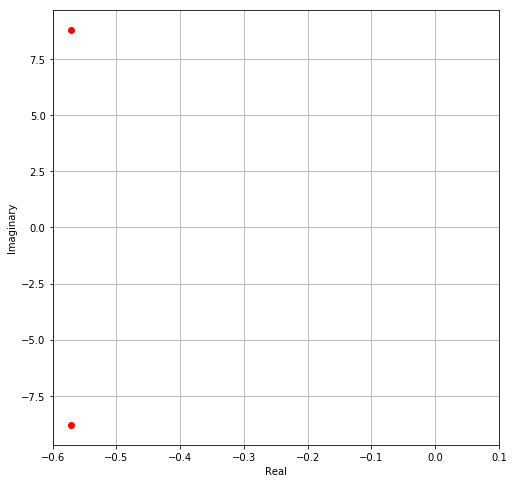

In [9]:
%matplotlib inline   
import matplotlib.pyplot as plt
fig_1 = plt.figure( figsize=(8, 8))
    
ax_rlocus = fig_1.add_subplot(1,1,1)


ax_rlocus.plot(w.real, w.imag, 'ro', linewidth=2)

ax_rlocus.set_xlabel('Real')
ax_rlocus.set_ylabel('Imaginary')

ax_rlocus.grid(True)
ax_rlocus.set_xlim([-0.6,0.1])
#fig_1.savefig('machine_1_delta_omega_{:d}.png'.format(int(fault_ms)))
plt.show()
